In [2]:
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("monthly-milk-production-pounds-p.csv")

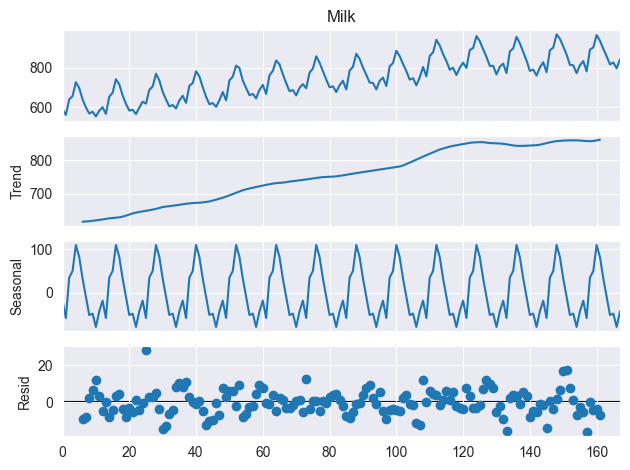

In [4]:
series=df["Milk"]
result=seasonal_decompose(series,model='additive',period=12)
result.plot()
plt.show()

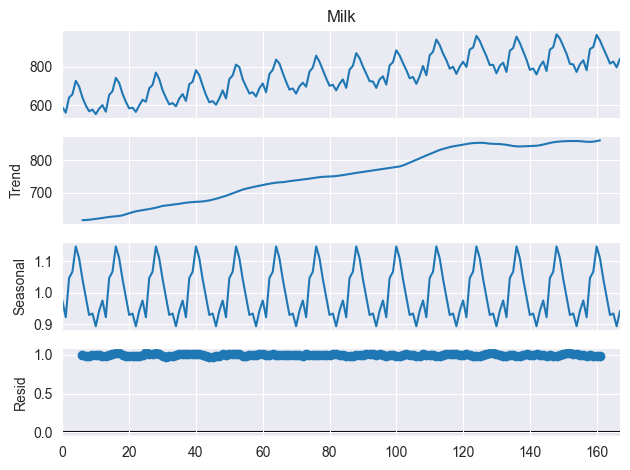

In [5]:
series=df["Milk"]
result=seasonal_decompose(series,model='multiplicative',period=12)
result.plot()
plt.show()

Centered Rolling Mean

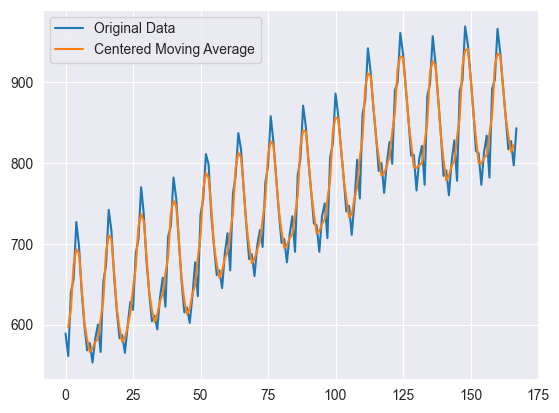

In [6]:
y=df['Milk']
fcast=y.rolling(3,center=True).mean()
plt.plot(y,label='Original Data')
plt.plot(fcast,label='Centered Moving Average')
plt.legend(loc='best')
plt.show()

Trailing Mean Average

In [7]:
y_train=df['Milk'].iloc[:-12]
y_test=df['Milk'].iloc[-12:]

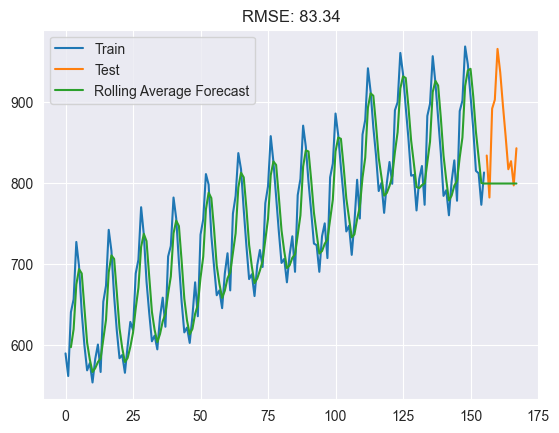

In [8]:
span=3
fcast=y_train.rolling(span).mean()
MA=fcast.iloc[-1]
MA_series=pd.Series(MA.repeat(len(y_test)))
MA_fcast=pd.concat([fcast,MA_series],ignore_index=True)
rmse=root_mean_squared_error(y_test,MA_series)
plt.title(f'RMSE: {rmse:.2f}')
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Test')
plt.plot(MA_fcast,label='Rolling Average Forecast')
plt.legend(loc='best')
plt.show()

Simple Exponential Smoothing

In [9]:
from statsmodels.tsa.api import SimpleExpSmoothing
from ipywidgets import interact,widgets

C:\Users\dai\AppData\Roaming\Python\Python313\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


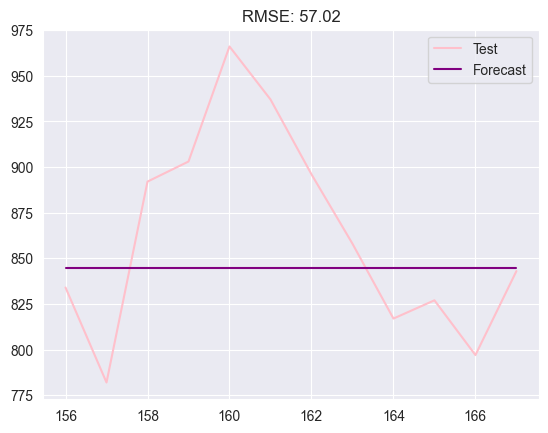

In [10]:
alpha=0.1
ses=SimpleExpSmoothing(y_train)
fit1=ses.fit(smoothing_level=alpha)
fcast1=fit1.forecast(len(y_test))
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
rmse=root_mean_squared_error(y_test,fcast1)
plt.title(f'RMSE: {rmse:.2f}')
plt.legend(loc='best')
plt.show()

In [11]:
ses=SimpleExpSmoothing(y_train)
def simp_exp(alpha):
    fit1=ses.fit(smoothing_level=alpha)
    fcast1=fit1.forecast(len(y_test))
    y_test.plot(color='pink',label='Test')
    fcast1.plot(color='purple',label='Forecast')
    rmse=root_mean_squared_error(y_test,fcast1)
    plt.title(f'RMSE: {rmse:.2f}')
    plt.legend(loc='best')
    plt.show()
widgets.interact(simp_exp,alpha=(0.01,1,0.01))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), Output()), _d…

<function __main__.simp_exp(alpha)>

Holt Linear Trend

In [12]:
from statsmodels.tsa.api import Holt, ExponentialSmoothing

In [13]:
holt=Holt(y_train)
def holt_linear(alpha,beta):
    fit1=holt.fit(smoothing_level=alpha,smoothing_trend=beta)
    fcast1=fit1.forecast(len(y_test))
    y_test.plot(color='pink',label='Test')
    fcast1.plot(color='purple',label='Forecast')
    rmse=root_mean_squared_error(y_test,fcast1)
    plt.title(f'RMSE: {rmse:.2f}, alpha={alpha:.2f}, beta={beta:.2f}')
    plt.legend(loc='best')
    plt.show()
widgets.interact(holt_linear,alpha=(0.01,1,0.01),beta=(0.01,1,0.01))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_linear(alpha, beta)>

Holt's Exponential Trend

In [14]:
# holt=Holt(y_train)
def holt_both(alpha,beta,exponentiality):
    holt=Holt(y_train,exponential=exponentiality)
    fit1=holt.fit(smoothing_trend=beta,smoothing_level=alpha)
    fcast1=fit1.forecast(len(y_test))
    y_test.plot(color='pink',label='Test')
    fcast1.plot(color='purple',label='Forecast')
    rmse=root_mean_squared_error(y_test,fcast1)
    plt.title(f'RMSE: {rmse:.2f}, alpha={alpha:.2f}, beta={beta:.2f}')
    plt.legend(loc='best')
    plt.show()
widgets.interact(holt_both,alpha=(0.01,1,0.01),beta=(0.01,1,0.01),exponentiality=[True,False])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_both(alpha, beta, exponentiality)>

Holt Winters method

In [15]:
def hw(alpha,beta,gamma,seasonality,periods=12):
    holt=ExponentialSmoothing(y_train,trend='add', seasonal=seasonality,seasonal_periods=periods)
    fit1=holt.fit(smoothing_trend=beta,smoothing_level=alpha,smoothing_seasonal=gamma)
    fcast1=fit1.forecast(len(y_test))
    y_test.plot(color='pink',label='Test')
    fcast1.plot(color='purple',label='Forecast')
    rmse=root_mean_squared_error(y_test,fcast1)
    plt.title(f'RMSE: {rmse:.2f}, alpha={alpha:.2f}, beta={beta:.2f}, gamma={gamma:.2f}')
    plt.legend(loc='best')
    plt.show()
widgets.interact(hw,alpha=(0.01,1,0.01),beta=(0.01,1,0.01),gamma=(0.01,1,0.01),seasonality=['add','mul'])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.hw(alpha, beta, gamma, seasonality, periods=12)>

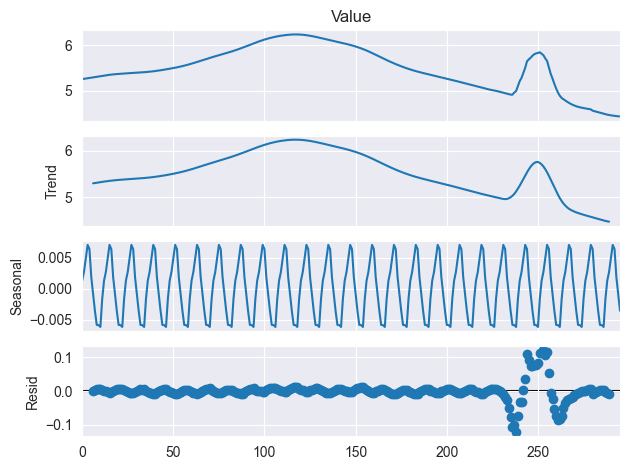

In [16]:
df=pd.read_csv('FRED-NROUST.csv')
series=df["Value"]
result=seasonal_decompose(series,model='additive',period=12)
result.plot()
plt.show()

No linear or any other pattern

In [22]:
from sklearn.model_selection import train_test_split
y_train=df['Value'].iloc[:-8]
y_test=df['Value'].iloc[-8:]

ses=SimpleExpSmoothing(y_train)
def simp_exp(alpha):
    fit1=ses.fit(smoothing_level=alpha)
    fcast1=fit1.forecast(len(y_test))
    y_test.plot(color='pink',label='Test')
    fcast1.plot(color='purple',label='Forecast')
    rmse=root_mean_squared_error(y_test,fcast1)
    plt.title(f'RMSE: {rmse:.2f}')
    plt.legend(loc='best')
    plt.show()
widgets.interact(simp_exp,alpha=(0.01,1,0.01))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), Output()), _d…

<function __main__.simp_exp(alpha)>

The forecast is flat so not appropriate


In [21]:
# holt=Holt(y_train)
def holt_both(alpha,beta,exponentiality):
    holt=Holt(y_train,exponential=exponentiality)
    fit1=holt.fit(smoothing_trend=beta,smoothing_level=alpha)
    fcast1=fit1.forecast(len(y_test))
    y_test.plot(color='pink',label='Test')
    fcast1.plot(color='purple',label='Forecast')
    rmse=root_mean_squared_error(y_test,fcast1)
    plt.title(f'RMSE: {rmse:.2f}, alpha={alpha:.2f}, beta={beta:.2f}')
    plt.legend(loc='best')
    plt.show()
widgets.interact(holt_both,alpha=(0.01,1,0.01),beta=(0.01,1,0.01),exponentiality=[True,False])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_both(alpha, beta, exponentiality)>

The forecast kindof matches with the y_test pattern